In [294]:
from AllGraphs import *
from Draw import *
from random import *
from math import *
graphConstructor = IncidencyGraph

In [295]:
class Automaton (BaseGraph) :

    def __init__(self) :
        self.states = dict() # chaque état envoie vers un dictionnaire dont les clés sont les transitions et les valeurs les états d'arrivée.
        self.init_state = None # état initial : d'où commence l'automate
        self.final_states = set() # états finaux : états pour lesquels une arrivée est considérée comme acceptant la situation

    def constructor(self) :
        return Automaton()

    def set_init_state(self, v) :
        self.init_state = v

    def add_final_state(self, v) :
        self.final_states.add(v)

    def add_final_states(self, it) :
        for e in it :
            self.add_final_state(e)

    def add_vertex(self, v) :
        # DONE : ajouter un état
        self.states[v] = dict()

    def add_vertices(self, vertices):
        for v in vertices:
            self.add_vertex(v)

    def add_edge(self, u, v, transition = "") :
        # DONE : ajouter une transition de u vers v par une lettre transition
        if transition not in self.states[u]:
            self.states[u][transition] = set()
        self.states[u][transition].add(v)

    def add_edges(self, edges):
        for (u, v), transition in edges.items():
            self.add_edge(u, v, transition)

    # self.states = {
    #     1: {"b": 1, "a": 2},
    #     2: {"b": 1, "a": 2}
    # }

    def get_transition(self, u, v) :
        # DONE : renvoyer une chaîne de caractères représentant les transitions de u vers v
        transitions = ""
        for transition, targets in self.states[u].items():
            for v in targets:
                transitions += transition
        return transitions

    def get_edges(self) :
        # DONE : renvoyer les transitions d'un état à un autre
        transitions = set()
        for u in self.states:
            for transition, targets in self.states[u].items():
                for v in targets:
                    transitions.add((u, v))
        return transitions

    def get_vertices(self) :
        # DONE : renvoyer l'ensemble des états
        vertices = set()
        for u in self.states:
            vertices.add(u)
        return vertices

    def has_vertex(self, v) :
        # DONE : indiquer si un état est présent dans l'automate
        return v in self.states

    def has_edge(self, u, v) :
        # DONE : indiquer si une transition existe de u vers v
        for targets in self.states[u].values():
            if v in targets:
                return True
        return False

    def remove_edge(self, u, v) :
        # DONE : supprimer les transitions de u vers v
        for transition, targets in list(self.states[u].items()):
            if v in targets:
                targets.remove(v)
                if not targets:
                    del self.states[u][transition]

    def remove_vertex(self, v):
        # DONE : supprimer l'état v
        for u in list(self.states):
            self.remove_edge(u, v)
        del self.states[v]

    def neigbors(self, v) :
        # DONE : renvoyer les états vers lesquels v peut prendre une transition
        neighbors = set()
        for targets in self.states[v].values():
            neighbors.update(targets)
        return neighbors

    def transpose(self) :
        # DONE : transposer l'automate (inverse le sens des transitions)
        transposed = Automaton()

        for v in self.states.keys():
            transposed.add_vertex(v)

        for u in self.states.keys():
            for transition, targets in self.states[u].items():
                for v in targets:
                    transposed.add_edge(v, u, transition)

        if self.final_states:
            transposed.set_init_state(list(self.final_states)[0])
        else:
            transposed.set_init_state(self.init_state)

        return transposed

    def aknowledge(self, word) :
        # DONE : vérifier si l'automate accepte un mot donné (il existe un chemin de l'état initial vers l'un des états finaux)
        current_states = {self.init_state}

        for letter in word:
            next_states = set()
            for state in current_states:
                if state in self.states and letter in self.states[state]:
                    next_states.update(self.states[state][letter])
            current_states = next_states
            if not current_states:
                return False
        return any(state in self.final_states for state in current_states)

    def completer(self, alpha) :
        # DONE : ajouter un état pour qu'il existe une transition depuis chaque lettre de l'alphabet
        puits = "puits"
        self.add_vertex(puits)

        for u in list(self.states.keys()):
            for letter in alpha:
                if letter not in self.states[u]:
                    self.add_edge(u, puits, letter)

    def determinist(self) :
        # DONE : indiquer si l'automate est déterministe (il ne peut prendre qu'une unique transition au maximum pour changer d'état)
        for u in self.states.keys():
            for transition, targets in self.states[u].items():
                if len(targets) > 1:
                    return False
        return True

    def determiniser(self, alpha) :
        # DONE : déterminiser l'automate (construire la table des transitions de chaque ensemble d'états et reconstruire le nouvel automate)
        det = Automaton()

        state_map = {}
        next_id = 0

        initial_set = (self.init_state,)
        state_map[initial_set] = next_id
        det.add_vertex(next_id)
        det.set_init_state(next_id)

        if self.init_state in self.final_states:
            det.add_final_state(next_id)

        queue = [initial_set]
        next_id += 1

        while queue:
            current_set = queue.pop(0)
            current_id = state_map[current_set]

            for letter in alpha:
                next_states = set()

                for state in current_set:
                    if state in self.states and letter in self.states[state]:
                        next_states.update(self.states[state][letter])

                if not next_states:
                    continue

                next_set = tuple(sorted(next_states))

                if next_set not in state_map:
                    state_map[next_set] = next_id
                    det.add_vertex(next_id)

                    for s in next_set:
                        if s in self.final_states:
                            det.add_final_state(next_id)
                            break
                    queue.append(next_set)
                    next_id += 1
                det.add_edge(current_id, state_map[next_set], letter)
        return det

In [296]:
def example_automate() :
	graph = Automaton()
	graph.add_vertices({1, 2, 3})
	graph.set_init_state(1)
	graph.add_final_states({3})
	edges = {(1, 2) : "b", (2, 1) : "a", (1, 1) : "a", (1, 3) : "a", (3, 3) : "b"}
	graph.add_edges(edges)
	return graph

a True
b False
ab True
ba False
aaabaaaaabbbb True
bbb False
bbbabbb False
abbb True
Est déterministe ? False


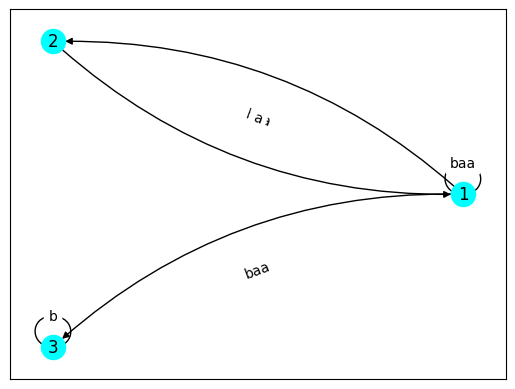

In [297]:
graph = example_automate()
words = ["a", "b", "ab", "ba", "aaabaaaaabbbb", "bbb", "bbbabbb", "abbb"]
for w in words :
    print(w, graph.aknowledge(w))
print("Est déterministe ?", graph.determinist())
draw_graph(graph)

a True
b False
ab True
ba False
aaabaaaaabbbb True
bbb False
bbbabbb False
abbb True
Est déterministe ? True


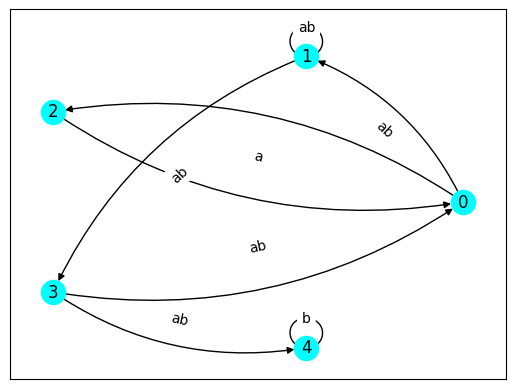

In [298]:
graph = example_automate()
graph = graph.determiniser("ab")
words = ["a", "b", "ab", "ba", "aaabaaaaabbbb", "bbb", "bbbabbb", "abbb"]
for w in words :
    print(w, graph.aknowledge(w))
print("Est déterministe ?", graph.determinist())
draw_graph(graph)

In [299]:
uniform = lambda x : [e / sum(x) for e in x]

def softmax_base(x, temperature) :
    # DONE : implémenter la distribution softmax (pour tout x_i, exp(x_i / température) / somme des exp(x_j / température) pour tout j)
    x_i = [exp(i/temperature) for i in x]
    x_j = 0
    for j in x:
        x_j += exp(j/temperature)

    return [val / x_j for val in x_i]

#print(softmax_base([2, 3, 10, 0], 5))

softmax = lambda temperature : lambda x : softmax_base(x, temperature)

In [300]:
def add_markov(text, graph, vision = 1) :
    # DONE : ajouter un texte dans le graph du nombre d'occurences de chaque transition d'une lettre ou groupe de lettre à sa suivante
    # DONE : paramétrer le graphe pour que chaque état se souvienne des vision - 1 précédentes lettres
    for i in range(len(text)-vision):
        actual_state = text[i:i+vision]
        next_state = text[i+1:i+vision+1]
        transit = text[i+vision]
        if not graph.has_vertex(actual_state):
            graph.add_vertex(actual_state)
        if not graph.has_vertex(next_state):
            graph.add_vertex(next_state)

        if graph.has_edge(actual_state, next_state):
            weight = graph.get_transition(actual_state, next_state)
            graph.add_edge(actual_state, next_state, weight+1)
        else:
            graph.add_edge(actual_state, next_state, 1)
    return graph

def normalize_markov(graph, proba_distribution = uniform) :
    # DONE : transformer le graphe en une chaîne de Markov en utilisant le nombre d'occurences de chaque transition et une loi de distribution des probabilités
    for u in graph.get_vertices():
        neighbors = list(graph.neighbors(u))
        if not neighbors:
            continue
        weights = []
        for v in neighbors:
            weight = graph.get_transition(u, v)
            weights.append(float(weight))
        if sum(weights):
            probs = proba_distribution(weights)

            for i, v in enumerate(neighbors):
                graph.remove_edge(u, v)
                graph.add_edge(u, v, f"{probs[i]:.2f}")
    return graph

def build_markov(text, graph, vision = 1, proba_distribution = uniform) :
	add_markov(text, graph, vision)
	normalize_markov(graph, proba_distribution)

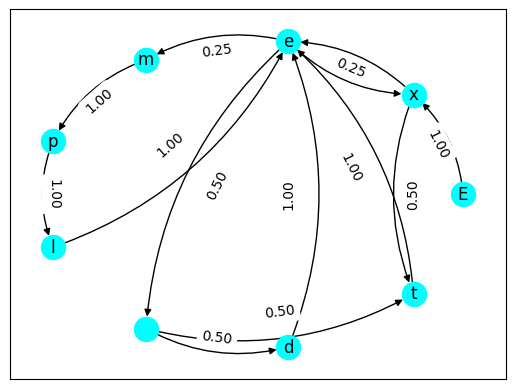

In [301]:
graph = graphConstructor()
build_markov("Exemple de texte", graph)
draw_graph(graph)

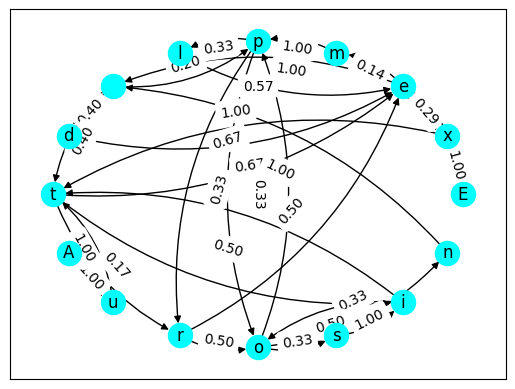

In [302]:
graph = graphConstructor()
add_markov("Exemple de texte", graph)
add_markov("Autre proposition de texte", graph)
normalize_markov(graph)
draw_graph(graph)

In [303]:
def generate(graph, vision = 1, repeats = 1) :
    # DONE : générer un texte via une marche aléatoire dans une chaîne de Markov
    vertices = list(graph.get_vertices())
    current_state = vertices[randint(0, len(vertices)-1)]
    res = current_state

    for _ in range(repeats):
        if not graph.has_vertex(current_state):
            break
        neighbors = list(graph.neighbors(current_state))
        if not neighbors:
            break

        cumulative_probs = []
        total_prob = 0

        for neighbor in neighbors:
            weight = float(graph.get_transition(current_state, neighbor))
            total_prob += weight
            cumulative_probs.append((neighbor, total_prob))

        rand = randint(1,1000) / 1000 * total_prob

        for neighbor, cum_prob in cumulative_probs:
            if rand <= cum_prob:
                next_state = neighbor
                break
        if vision > 1:
            res += next_state[-1]
        else:
            res += next_state

        current_state = next_state

    return res

In [304]:
graph = graphConstructor()
build_markov("Exemple de texte.e", graph)
print(generate(graph, repeats = 100))

xe texe de dexe te temple de demple te.e.e.e te.exte dextemplemplemple te temple.e.e.exte dexte dexte


In [305]:
graph = graphConstructor()
build_markov("Exemple dABCAZDEe texte.e", graph, vision = 2)
print(generate(graph, vision = 2, repeats = 10))

ple texte.e


In [306]:
filenames = []
# DONE : vous devez copier les fichiers .c et trancho_codes_liste.txt dans un dossier "ressources" à côté de ce script
with open("ressources/trancho_codes_liste.txt", "r") as f :
    filenames += ["ressources/%s" % e for e in f.read().split("\n") if len(e) > 0]
vision = 20
repeats = 1
temperature = 0
graph = graphConstructor()
for filename in filenames :
    with open(filename, "r") as f :
        graph = add_markov(f.read(), graph, vision = vision)
        print("Loaded \"%s\"" % filename)
graph = normalize_markov(graph, proba_distribution = softmax(temperature) if temperature != 0 else uniform)
print("Graph with %d vertices and %d edges" % (len(graph.get_vertices()), len(graph.get_edges())))

Loaded "ressources/002_01_hello_esgi.c"
Loaded "ressources/003_01_student_hello.c"
Loaded "ressources/004_02_concept_variables.c"
Loaded "ressources/005_02_afficher_variables.c"
Loaded "ressources/006_02_lecture_variable.c"
Loaded "ressources/007_02_int_hexa.c"
Loaded "ressources/008_02_affectations.c"
Loaded "ressources/009_02_traduction.c"
Loaded "ressources/010_02_int_overflow.c"
Loaded "ressources/011_02_float_imprecision.c"
Loaded "ressources/012_02_int_part.c"
Loaded "ressources/013_02_hexadecimal.c"
Loaded "ressources/015_02_shapes.c"
Loaded "ressources/016_03_calculer.c"
Loaded "ressources/017_03_operations.c"
Loaded "ressources/018_03_division_par_zero.c"
Loaded "ressources/019_03_addition.c"
Loaded "ressources/020_03_imprecision.c"
Loaded "ressources/021_03_message_code.c"
Loaded "ressources/022_03_angle.c"
Loaded "ressources/023_03_ip.c"
Loaded "ressources/024_03_binet.c"
Loaded "ressources/025_03_shooter.c"
Loaded "ressources/026_04_categorie_age.c"
Loaded "ressources/027_0

In [307]:
import subprocess
print("Running generation.")
subprocess.getoutput("mkdir results")
for i in range(repeats) :
    result = generate(graph, vision = vision, repeats = 10000)
    print(result)
    with open("results/main%03d.c" % i, "w") as f :
        f.write(result)

Running generation.
ring.h>
#include <math.h>

/* Nous utilisons un typedef pour s'Ã©viter l'Ã©criture struct   */
/* Vecteur2d dans la suite et la remplacer par une Ã©criture    */
/* Vecteur2d.                     */
  /* L'Ã©valution de a * b se fait alors sur 8 octets avant     */
  /* d'Ãªtre affectÃ©e.                                     */
  /* printf affiche Ã  l'utilisateur un message significatif    */
  /* pour lui indiquer qu'il devra entrer deux valeurs         */
  /* entiÃ¨res.                                               */
  printf("%lx\n", gros_nombre);
  int entier = 0xffffffffffffffff;
  /* 2. */
  printf("%lu\n", gros_nombre);
  /* Bob a oubliÃ© de lister la valeur de gros_nombre aprÃ¨s la  */
  /* chaÃ®ne. */
  /* Le format d'affichage est de mÃªme %lu                                    */
  /* sscanf prend en paramÃ¨tres :                              */
  for(i = 0; texte[i] != '\0'; ++i) {
      if(buffer[i] == c || buffer[i] == (c + 'A' - 'a')) {
        ++co